In [2]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
import inspect

top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from benchmarking import RandomParams, Benchmark, new_random_benchmark, Solver, new_graph_file_benchmark
import re

In [15]:
def generate():
  return [
    RandomParams(directed=True, num_vertices=50, average_degree=a) 
      for a in np.arange(1, 2.0, 0.1) for _ in range(100)
  ]

params_code = inspect.getsource(generate)
params_list = generate()

benchmark = new_random_benchmark(params_list, solvers=[
	Solver("brute", "FAST_BOUND"),
	Solver("brute", "BRUTE_FORCE"),
], params_code = params_code, override_benchmark_path="../benchmarks/test")

benchmark.benchmark_path

'../benchmarks/test(5)'

In [31]:
benchmark = Benchmark.load("../benchmarks/test(5)")

In [16]:
benchmark.run(retryFailures=False, timeout=10)


graph: 0.txt, solver: brute('FAST_BOUND') ... 

✅
length: 7, run_time: 1.1e-05
graph: 1.txt, solver: brute('FAST_BOUND') ... ✅
length: 5, run_time: 8e-06
graph: 2.txt, solver: brute('FAST_BOUND') ... ✅
length: 11, run_time: 1.8e-05
graph: 3.txt, solver: brute('FAST_BOUND') ... ✅
length: 15, run_time: 1.4e-05
graph: 4.txt, solver: brute('FAST_BOUND') ... ✅
length: 7, run_time: 8e-06
graph: 5.txt, solver: brute('FAST_BOUND') ... ✅
length: 17, run_time: 1.9e-05
graph: 6.txt, solver: brute('FAST_BOUND') ... ✅
length: 13, run_time: 1.4e-05
graph: 7.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 9e-06
graph: 8.txt, solver: brute('FAST_BOUND') ... ✅
length: 17, run_time: 1.2e-05
graph: 9.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 9e-06
graph: 10.txt, solver: brute('FAST_BOUND') ... ✅
length: 14, run_time: 1e-05
graph: 11.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 8e-06
graph: 12.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 8e-06
graph: 13.txt, solver: brute('FAST_BOUND') ... ✅
l

In [125]:
df = benchmark.get_dataframe()
df

,path,run_time,length,solver,graph_id,solver_name,vertices,edges,average_out_degree,directed_spec,num_vertices_spec,average_degree_spec
0,"[10, 38, 47, 40, 26, 37, 31, 7]",0.000011,7,0,0,brute('FAST_BOUND'),50,47,0.94,True,50,1.0
1,"[33, 41, 49, 32, 28, 29]",0.000008,5,0,1,brute('FAST_BOUND'),50,40,0.80,True,50,1.0
2,"[38, 48, 33, 34, 2, 12, 18, 15, 20, 22, 35, 32]",0.000018,11,0,2,brute('FAST_BOUND'),50,46,0.92,True,50,1.0
3,"[12, 44, 5, 48, 0, 20, 36, 31, 22, 38, 49, 13,...",0.000014,15,0,3,brute('FAST_BOUND'),50,51,1.02,True,50,1.0
4,"[1, 37, 44, 3, 23, 43, 7, 46]",0.000008,7,0,4,brute('FAST_BOUND'),50,44,0.88,True,50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"[37, 48, 8, 19, 2, 22, 45, 28, 3, 35, 47, 27, ...",0.000812,27,1,995,brute('BRUTE_FORCE'),50,110,2.20,True,50,1.9
1996,"[12, 38, 11, 39, 17, 42, 37, 4, 10, 5, 28, 40,...",0.000627,28,1,996,brute('BRUTE_FORCE'),50,96,1.92,True,50,1.9
1997,"[35, 25, 47, 15, 41, 48, 3, 20, 14, 17, 16, 34...",0.000017,17,1,997,brute('BRUTE_FORCE'),50,85,1.70,True,50,1.9
1998,"[6, 35, 47, 49, 10, 45, 29, 28, 4, 11, 25, 5, ...",0.011542,34,1,998,brute('BRUTE_FORCE'),50,104,2.08,True,50,1.9


<Axes: xlabel='average_out_degree', ylabel='average_degree_spec'>

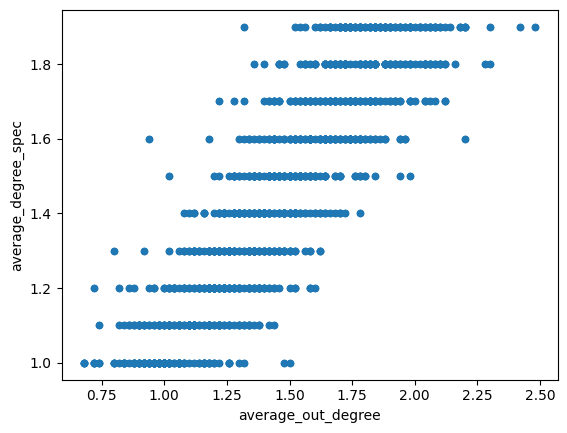

In [127]:
df[["average_out_degree", "average_degree_spec"]].plot.scatter(x="average_out_degree", y="average_degree_spec")

<Axes: title={'center': 'average_out_degree'}, xlabel='[average_degree_spec]'>

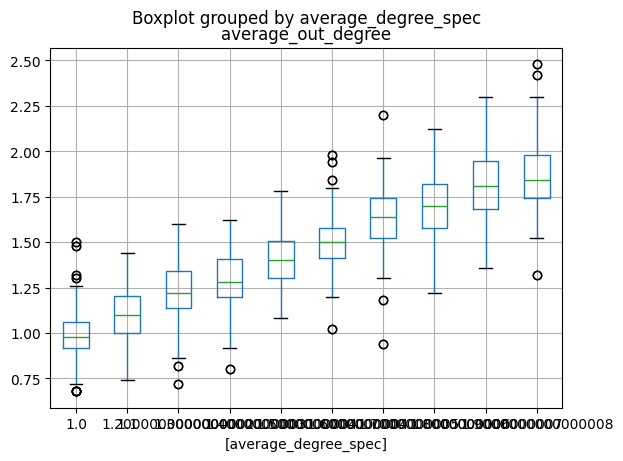

In [128]:
df[["average_out_degree", "average_degree_spec"]].boxplot(by="average_degree_spec")


<Axes: ylabel='Frequency'>

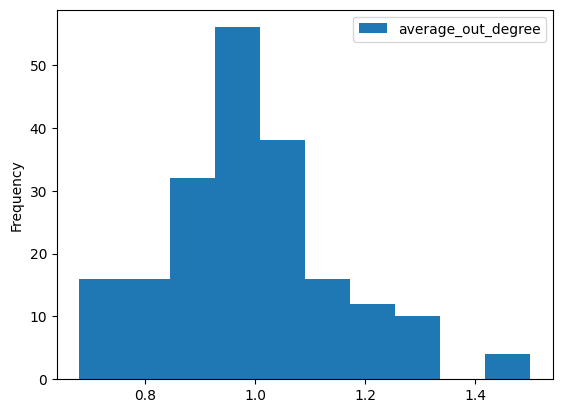

In [130]:
df[df["average_degree_spec"] == 1.0][["average_out_degree"]].plot.hist(bins=10)

run_time    Axes(0.125,0.11;0.775x0.77)
dtype: object

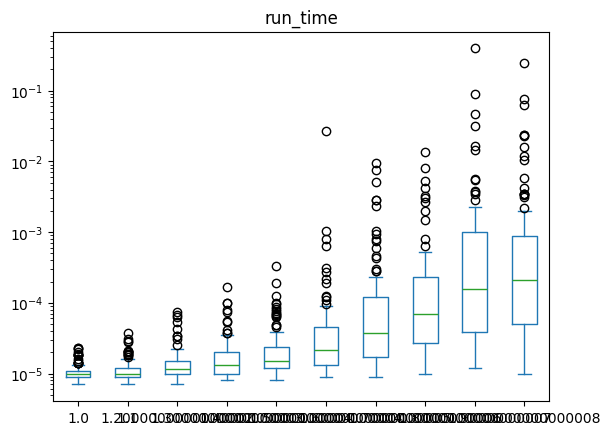

In [132]:
df[df["solver"] == 0][["run_time", "average_degree_spec"]].plot.box(by="average_degree_spec", logy=True)


In [139]:
view = df[['average_degree_spec', 'solver_name','length', 'run_time']]

to_plot = df.groupby(['average_degree_spec', 'solver', 'solver_name']).agg({'run_time': 'mean'}).reset_index() \
    .pivot(index='average_degree_spec', columns='solver_name', values='run_time') \
    .rename(columns=lambda x: x + " (average)");

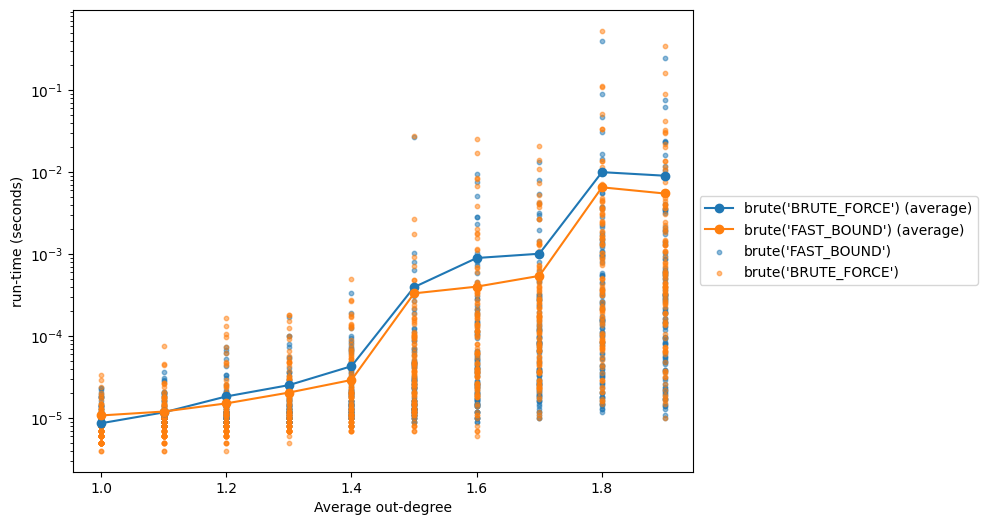

In [142]:
to_plot.plot(style="o-")

for solver_name in solver_names:
    solver_df = df[df["solver_name"] == solver_name]  # Select rows where run-time is not null
    plt.scatter(solver_df['average_degree_spec'], solver_df['run_time'], label=solver_name, alpha=0.5, s=10)

plt.yscale('log')
# plt.xticks(np.arange(1, 4.0, 0.5))
plt.ylabel("run-time (seconds)")
plt.xlabel("Average out-degree")
# plt.title("Longest path solve-time for random directed graphs with 50 vertices")
# plt.axhline(y=0.015, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# df[df["solver"] == 0].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# df[df["solver"] == 1].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# plt.ylim(0, 0.010)

plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

In [144]:
df[df["average_out_degree"] > 2]

,path,run_time,length,solver,graph_id,solver_name,vertices,edges,average_out_degree,directed_spec,num_vertices_spec,average_degree_spec
618,"[18, 47, 1, 13, 29, 24, 44, 46, 43, 42, 30, 21...",0.009357,37,0,618,brute('FAST_BOUND'),50,110,2.20,True,50,1.6
721,"[4, 48, 44, 36, 26, 49, 13, 35, 18, 12, 27, 29...",0.000459,27,0,721,brute('FAST_BOUND'),50,106,2.12,True,50,1.7
742,"[11, 33, 16, 1, 34, 25, 36, 21, 9, 30, 44, 48,...",0.008035,33,0,742,brute('FAST_BOUND'),50,102,2.04,True,50,1.7
751,"[24, 38, 4, 31, 7, 43, 12, 3, 8, 44, 29, 26, 1...",0.003215,34,0,751,brute('FAST_BOUND'),50,102,2.04,True,50,1.7
752,"[35, 41, 43, 23, 6, 49, 48, 22, 47, 34, 45, 11...",0.000159,24,0,752,brute('FAST_BOUND'),50,103,2.06,True,50,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1987,"[7, 49, 15, 38, 28, 27, 10, 11, 42, 34, 41, 25...",0.088597,37,1,987,brute('BRUTE_FORCE'),50,124,2.48,True,50,1.9
1993,"[49, 16, 21, 29, 24, 30, 39, 19, 42, 28, 2, 22...",0.000402,23,1,993,brute('BRUTE_FORCE'),50,105,2.10,True,50,1.9
1994,"[7, 6, 49, 46, 45, 38, 22, 35, 47, 13, 27, 36,...",0.004504,34,1,994,brute('BRUTE_FORCE'),50,101,2.02,True,50,1.9
1995,"[37, 48, 8, 19, 2, 22, 45, 28, 3, 35, 47, 27, ...",0.000812,27,1,995,brute('BRUTE_FORCE'),50,110,2.20,True,50,1.9


In [145]:
to_plot2 = df[df["average_out_degree"] < 2].groupby("solver").get_group(0)[["run_time", "average_out_degree"]].sort_values(by="average_out_degree")
to_plot2


,run_time,average_out_degree
39,0.000009,0.68
58,0.000007,0.68
36,0.000009,0.68
26,0.000009,0.72
249,0.000007,0.72
...,...,...
536,0.001033,1.98
967,0.000870,1.98
724,0.000492,1.98
939,0.001046,1.98


<Axes: xlabel='average_out_degree'>

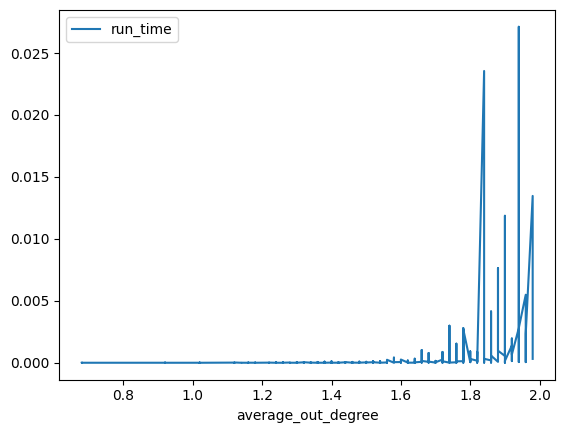

In [146]:
to_plot2.plot(x="average_out_degree", y="run_time")

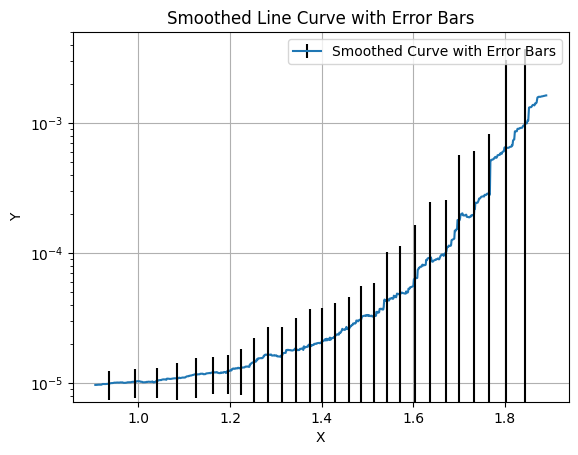

In [148]:
rolling_window = 100
df_smoothed = to_plot2.rolling(rolling_window, center=True).mean()
df_std = to_plot2.rolling(rolling_window, center=True).std()

# Plot the smoothed curve with error bars
plt.errorbar(df_smoothed['average_out_degree'], df_smoothed['run_time'], yerr=df_std['run_time'], label='Smoothed Curve with Error Bars', errorevery=30, barsabove=True, ecolor="black")
plt.xlabel('X')
plt.ylabel('Y')
plt.yscale('log')
plt.title('Smoothed Line Curve with Error Bars')
plt.legend()
plt.grid(True)
plt.show()